In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pyrsm as rsm
from datetime import timedelta
from datetime import datetime


data = pd.read_csv('social_data.xlsx - Data.csv')

In [2]:
data.head(10)

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type
0,03-31-2023 19:55,CSGO,TWITTER,N/A,0,0,Text
1,03-31-2023 19:49,CSGO,TWITTER,N/A,0,0,Text
2,03-31-2023 19:49,CSGO,TWITTER,N/A,0,0,Text
3,03-31-2023 19:49,CSGO,TWITTER,N/A,0,0,Text
4,03-31-2023 19:43,CSGO,TWITTER,Community Engagement,9517,1215,Video
5,03-31-2023 19:42,CSGO,TWITTER,N/A,0,0,Photo
6,03-31-2023 19:40,CSGO,TWITTER,Community Engagement,1882,83,Photo
7,03-31-2023 19:23,CSGO,TWITTER,Community Engagement,17892,3076,Video
8,03-31-2023 19:15,CSGO,TWITTER,N/A,0,0,Video
9,03-31-2023 18:55,CSGO,TWITTER,Community Engagement,13874,1447,Video


# Data Cleaning and Exploration

In [3]:
data.shape

(3479, 7)

In [4]:
unique_accounts = data['Account'].unique()
unique_accounts

array(['CSGO', 'General ', 'DOTA2', 'Content Creators', 'Valorant',
       'General'], dtype=object)

In [5]:
data['Account'] = data['Account'].str.replace('General ', 'General')

In [8]:
unique_accounts1 = data['Account'].unique()
unique_accounts1

array(['CSGO', 'General', 'DOTA2', 'Content Creators', 'Valorant'],
      dtype=object)

## Comment on taking the general row

In [13]:
filtered_data = data[data['Campaign Name'].str.strip() != 'N/A']
filtered_data

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type
4,03-31-2023 19:43,CSGO,TWITTER,Community Engagement,9517,1215,Video
6,03-31-2023 19:40,CSGO,TWITTER,Community Engagement,1882,83,Photo
7,03-31-2023 19:23,CSGO,TWITTER,Community Engagement,17892,3076,Video
9,03-31-2023 18:55,CSGO,TWITTER,Community Engagement,13874,1447,Video
10,03-31-2023 18:36,General,FBPAGE,Community Engagement,37692,8044,Photo
...,...,...,...,...,...,...,...
3440,01-08-2023 11:47,General,TWITTER,Community Engagement,19823,243,Photo
3459,01-05-2023 09:00,CSGO,TWITTER,Community Engagement,445130,10597,Video
3461,01-04-2023 14:57,General,FBPAGE,Community Engagement,155521,19098,Photo
3464,01-04-2023 13:00,General,TWITTER,Community Engagement,136660,2371,Photo


In [15]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 4 to 3465
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Published Date     1994 non-null   object
 1   Account            1994 non-null   object
 2   Account Type       1994 non-null   object
 3   Campaign Name      1994 non-null   object
 4   Total Impressions  1994 non-null   int64 
 5   Total Engagements  1994 non-null   int64 
 6   Media Type         1994 non-null   object
dtypes: int64(2), object(5)
memory usage: 124.6+ KB


In [16]:
filtered_data['Published Date'] = pd.to_datetime(filtered_data['Published Date'])
filtered_data.dtypes

/tmp/ipykernel_56789/735474853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Published Date'] = pd.to_datetime(filtered_data['Published Date'])


Published Date       datetime64[ns]
Account                      object
Account Type                 object
Campaign Name                object
Total Impressions             int64
Total Engagements             int64
Media Type                   object
dtype: object

In [17]:
filtered_data['Date'] = filtered_data['Published Date'].dt.date
filtered_data['Time'] = filtered_data['Published Date'].dt.time

/tmp/ipykernel_56789/272516724.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Date'] = filtered_data['Published Date'].dt.date
/tmp/ipykernel_56789/272516724.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Time'] = filtered_data['Published Date'].dt.time


In [18]:
filtered_data.head()

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type,Date,Time
4,2023-03-31 19:43:00,CSGO,TWITTER,Community Engagement,9517,1215,Video,2023-03-31,19:43:00
6,2023-03-31 19:40:00,CSGO,TWITTER,Community Engagement,1882,83,Photo,2023-03-31,19:40:00
7,2023-03-31 19:23:00,CSGO,TWITTER,Community Engagement,17892,3076,Video,2023-03-31,19:23:00
9,2023-03-31 18:55:00,CSGO,TWITTER,Community Engagement,13874,1447,Video,2023-03-31,18:55:00
10,2023-03-31 18:36:00,General,FBPAGE,Community Engagement,37692,8044,Photo,2023-03-31,18:36:00


In [19]:
filtered_data.describe()

,Total Impressions,Total Engagements
count,1994.000000,1994.000000
mean,15483.991976,1140.019559
std,32784.477628,3244.459612
min,0.000000,0.000000
25%,1300.250000,18.000000
50%,6242.500000,110.500000
75%,18345.000000,516.000000
max,452337.000000,41102.000000


In [20]:
for column in filtered_data.columns:
    unique_values = filtered_data[column].nunique()
    print(f"Column '{column}' has {unique_values} unique value(s).")

Column 'Published Date' has 1453 unique value(s).
Column 'Account' has 5 unique value(s).
Column 'Account Type' has 6 unique value(s).
Column 'Campaign Name' has 3 unique value(s).
Column 'Total Impressions' has 1786 unique value(s).
Column 'Total Engagements' has 836 unique value(s).
Column 'Media Type' has 6 unique value(s).
Column 'Date' has 79 unique value(s).
Column 'Time' has 658 unique value(s).


In [21]:
total_impressions = filtered_data['Total Impressions'].sum()
total_engagements = filtered_data['Total Engagements'].sum()

In [24]:
# Group by Media Type and Campaign Name together
grouped_by_both = filtered_data.groupby(['Account Type', 'Media Type', 'Campaign Name']).sum()
print("\nGrouped by Media Type and Campaign Name:")
print(grouped_by_both[['Total Impressions', 'Total Engagements']])


Grouped by Media Type and Campaign Name:
                                                   Total Impressions  \
Account Type     Media Type Campaign Name                              
FBPAGE           Link       Community Engagement                   0   
                            Evil Exhibited                      6416   
                 Photo      Community Engagement             6456566   
                            Evil Exhibited                    441010   
                 Text       Community Engagement              696958   
                 Video      Community Engagement             1718706   
                            Evergreen                          61643   
                            Evil Exhibited                     80454   
INSTAGRAM        Carousel   Community Engagement              150663   
                            Evil Exhibited                     10026   
                 Photo      Community Engagement              940349   
                      

/tmp/ipykernel_56789/336351634.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_by_both = filtered_data.groupby(['Account Type', 'Media Type', 'Campaign Name']).sum()


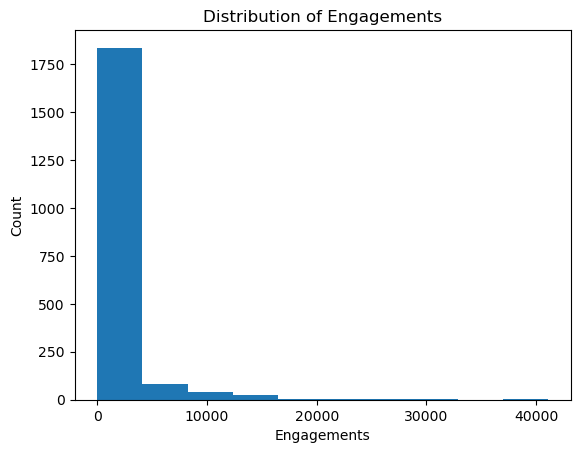

In [25]:
# Plotting the distribution of engagements
plt.hist(filtered_data['Total Engagements'], bins=10)
plt.xlabel('Engagements')
plt.ylabel('Count')
plt.title('Distribution of Engagements')
plt.show()

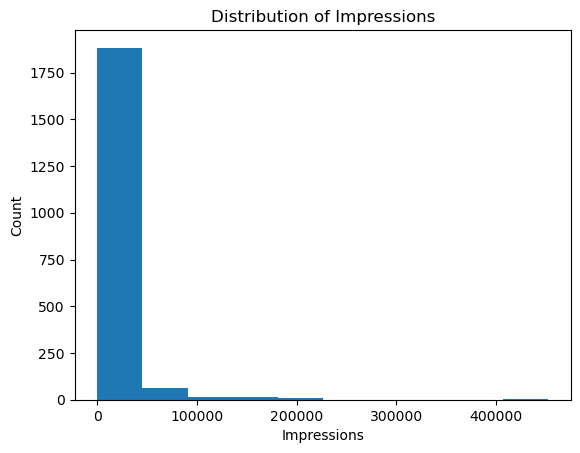

In [26]:
# Plotting the distribution of impressions
plt.hist(filtered_data['Total Impressions'], bins=10)
plt.xlabel('Impressions')
plt.ylabel('Count')
plt.title('Distribution of Impressions')
plt.show()

In [27]:
# Log transformation of engagements and impressions
filtered_data['Engagements_log'] = np.log1p(filtered_data['Total Engagements'])
filtered_data['Impressions_log'] = np.log1p(filtered_data['Total Impressions'])

/tmp/ipykernel_56789/2293447970.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Engagements_log'] = np.log1p(filtered_data['Total Engagements'])
/tmp/ipykernel_56789/2293447970.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Impressions_log'] = np.log1p(filtered_data['Total Impressions'])


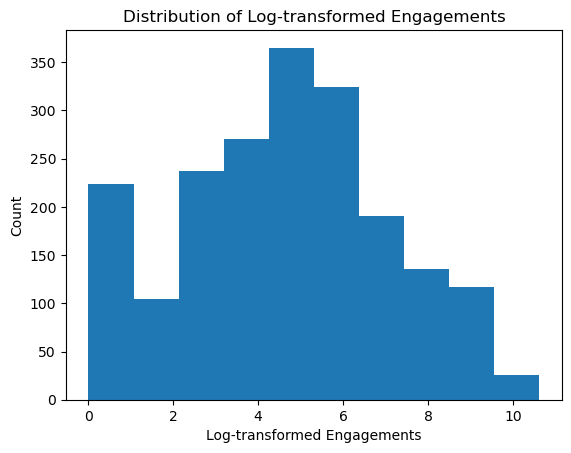

In [28]:
# Plotting the log-transformed distributions
plt.hist(filtered_data['Engagements_log'], bins=10)
plt.xlabel('Log-transformed Engagements')
plt.ylabel('Count')
plt.title('Distribution of Log-transformed Engagements')
plt.show()

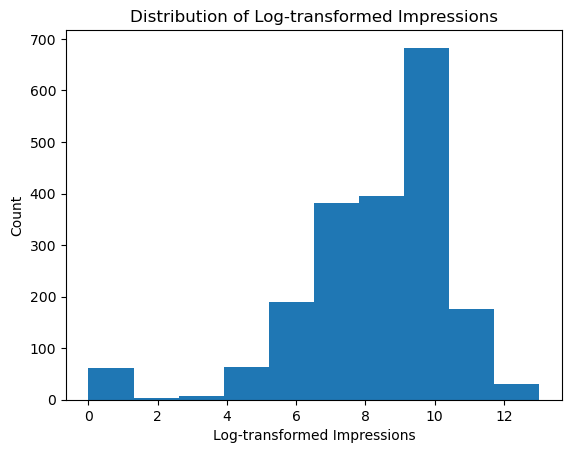

In [29]:
plt.hist(filtered_data['Impressions_log'], bins=10)
plt.xlabel('Log-transformed Impressions')
plt.ylabel('Count')
plt.title('Distribution of Log-transformed Impressions')
plt.show()

In [30]:
filtered_data['Engagement Rate'] = (filtered_data['Total Engagements'] / filtered_data['Total Impressions']) * 100
filtered_data['Engagement Rate Log'] = (filtered_data['Engagements_log'] / filtered_data['Impressions_log']) * 100

/tmp/ipykernel_56789/4252004082.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Engagement Rate'] = (filtered_data['Total Engagements'] / filtered_data['Total Impressions']) * 100
/tmp/ipykernel_56789/4252004082.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Engagement Rate Log'] = (filtered_data['Engagements_log'] / filtered_data['Impressions_log']) * 100


In [31]:
filtered_data.head()

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type,Date,Time,Engagements_log,Impressions_log,Engagement Rate,Engagement Rate Log
4,2023-03-31 19:43:00,CSGO,TWITTER,Community Engagement,9517,1215,Video,2023-03-31,19:43:00,7.103322,9.160940,12.766628,77.539227
6,2023-03-31 19:40:00,CSGO,TWITTER,Community Engagement,1882,83,Photo,2023-03-31,19:40:00,4.430817,7.540622,4.410202,58.759305
7,2023-03-31 19:23:00,CSGO,TWITTER,Community Engagement,17892,3076,Video,2023-03-31,19:23:00,8.031710,9.792165,17.192041,82.021805
9,2023-03-31 18:55:00,CSGO,TWITTER,Community Engagement,13874,1447,Video,2023-03-31,18:55:00,7.277939,9.537844,10.429581,76.305910
10,2023-03-31 18:36:00,General,FBPAGE,Community Engagement,37692,8044,Photo,2023-03-31,18:36:00,8.992806,10.537230,21.341399,85.343172


# Question 1 - What is the typical engagement rate we can expect? What’s the likelihood that we can achieve a 15% engagement rate?

In [32]:
data_er_at = filtered_data.groupby('Account Type')['Engagement Rate'].mean()

In [33]:
data_er_at

Account Type
FBPAGE              14.605891
INSTAGRAM            1.228905
LINKEDIN_COMPANY     1.931654
TIKTOK_BUSINESS      4.805182
TWITTER              3.385004
YOUTUBE              5.306207
Name: Engagement Rate, dtype: float64

In [34]:
data_er_at_cm = filtered_data.groupby(['Account Type', 'Campaign Name'])['Engagement Rate'].mean()
data_er_at_cm

Account Type      Campaign Name        
FBPAGE            Community Engagement     15.992891
                  Evergreen                13.098000
                  Evil Exhibited            3.513447
INSTAGRAM         Community Engagement      1.208653
                  Evergreen                 1.744471
                  Evil Exhibited            0.815349
LINKEDIN_COMPANY  Community Engagement      1.860454
                  Evil Exhibited            3.213268
TIKTOK_BUSINESS   Community Engagement      6.422724
                  Evergreen                 4.832811
                  Evil Exhibited            3.770242
TWITTER           Community Engagement      3.476648
                  Evergreen                11.770774
                  Evil Exhibited            2.987679
YOUTUBE           Community Engagement      8.240741
                  Evergreen                 3.881755
                  Evil Exhibited            5.023604
Name: Engagement Rate, dtype: float64

# Question 2 - Does day of the week and time of posting affect engagement rates?

In [35]:
filtered_data['Day of Week'] = filtered_data['Published Date'].dt.day_name()
filtered_data['Hour of Day'] = filtered_data['Published Date'].dt.hour

/tmp/ipykernel_56789/548829108.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Day of Week'] = filtered_data['Published Date'].dt.day_name()
/tmp/ipykernel_56789/548829108.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Hour of Day'] = filtered_data['Published Date'].dt.hour


In [36]:
engagement_by_day = filtered_data.groupby('Day of Week')['Total Engagements'].mean()

engagement_by_hour = filtered_data.groupby('Hour of Day')['Total Engagements'].mean()

In [37]:
engagement_by_day

Day of Week
Friday       1352.128146
Monday        798.360000
Saturday      650.410377
Sunday       1255.088757
Thursday      935.625000
Tuesday      1537.257962
Wednesday    1110.327536
Name: Total Engagements, dtype: float64

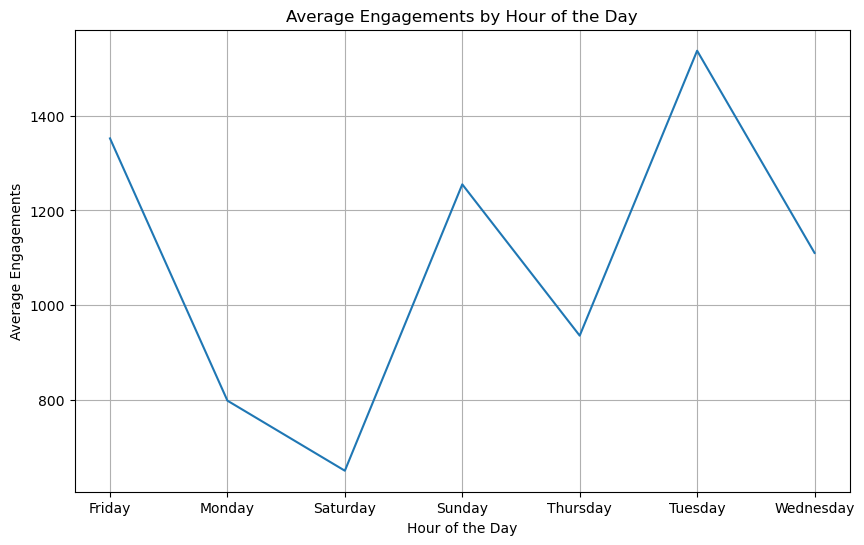

In [38]:
# Create a time series plot
plt.figure(figsize=(10, 6))
engagement_by_day.plot()
plt.xlabel('Hour of the Day')
plt.ylabel('Average Engagements')
plt.title('Average Engagements by Hour of the Day')
plt.grid(True)
plt.show()

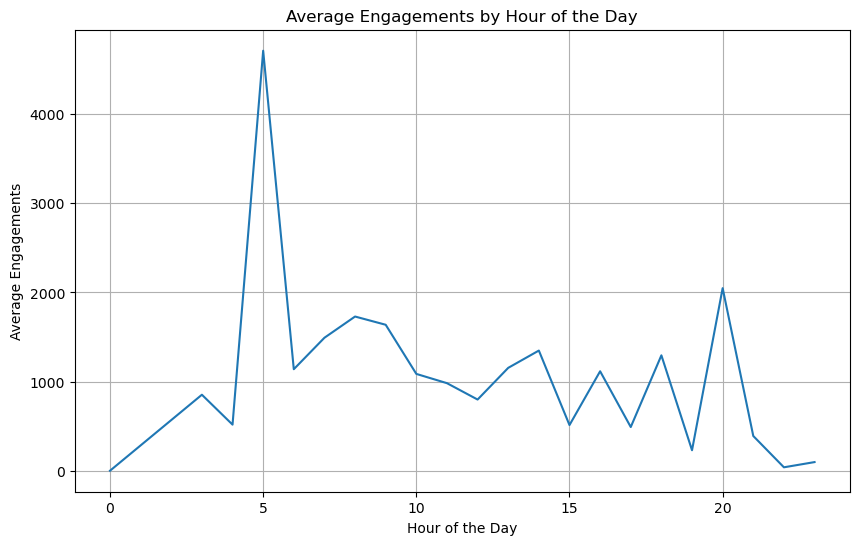

In [39]:
# Create a time series plot
plt.figure(figsize=(10, 6))
engagement_by_hour.plot()
plt.xlabel('Hour of the Day')
plt.ylabel('Average Engagements')
plt.title('Average Engagements by Hour of the Day')
plt.grid(True)
plt.show()

# Question 3 -  How are our game titles doing in terms of social performance? Is there a specific game

In [40]:
grouped_by_account = filtered_data.groupby('Account').mean()
print("\nGrouped by Account:")
print(grouped_by_account['Engagement Rate'])


Grouped by Account:
Account
CSGO                 3.798739
Content Creators    18.670179
DOTA2                5.212327
General              5.030611
Valorant             5.374779
Name: Engagement Rate, dtype: float64


/tmp/ipykernel_56789/138766022.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_by_account = filtered_data.groupby('Account').mean()


# Question 4 - What media type performs the best?

In [41]:
grouped_by_media_type = filtered_data.groupby('Media Type').mean()
print("Grouped by Media Type:")
print(grouped_by_media_type[['Total Impressions', 'Total Engagements', 'Engagement Rate']])

Grouped by Media Type:
            Total Impressions  Total Engagements  Engagement Rate
Media Type                                                       
Carousel         17854.333333         726.777778         3.784294
Link              6277.812500          50.375000         0.935904
Mixed            37823.333333        2785.333333        10.724648
Photo            20969.517820        1639.581761         5.354994
Text              6826.223301         446.132686         3.960105
Video            12060.855895         807.385735         5.050341


/tmp/ipykernel_56789/3073886929.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_by_media_type = filtered_data.groupby('Media Type').mean()


# Question 5 - What is our best performing campaign?

In [44]:
# Group by Campaign Name
grouped_by_campaign_name = filtered_data.groupby('Campaign Name').mean()
print("\nGrouped by Campaign Name:")
print(grouped_by_campaign_name[['Total Impressions', 'Total Engagements', 'Engagement Rate']])


Grouped by Campaign Name:
                       Total Impressions  Total Engagements  Engagement Rate
Campaign Name                                                               
Community Engagement        16870.131821        1449.161588         5.765298
Evergreen                    8151.711656         264.582822         3.510548
Evil Exhibited              13672.845238         441.202381         2.866060


/tmp/ipykernel_56789/135594761.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_by_campaign_name = filtered_data.groupby('Campaign Name').mean()


# Question 6 - Define out a posting strategy for our social channels based on your discoveries.

# Question - 7 What suggestions would you give to the social media team if they want to expand their presence (e.g. if our CSGO youtube channel is doing well should we expand to TikTok)?